In [1]:
# mlp using keras for multiclass classification 
!pip install keras

In [2]:
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.utils import to_categorical
from keras.datasets import mnist
from keras import utils
 

In [3]:
        
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
y_test.shape

(10000,)

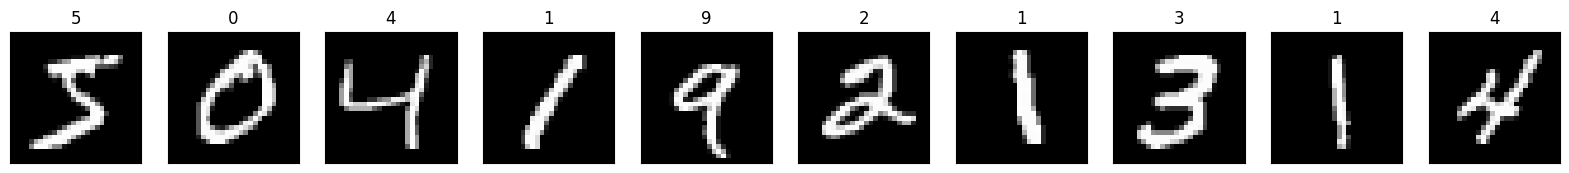

In [8]:
fig, axes = plt.subplots(ncols=10, sharex=False, sharey=True, figsize=(20, 4))
for i in range(10):
    axes[i].set_title(y_train[i])
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

label value 3 will be converted into 10 dimensional output
[0,0,0,1,0,0,0,0,0,0]   so we use to_categorical() method for this 10d output

In [11]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [12]:
y_train.shape

(60000, 10)

In [13]:
y_test.shape

(10000, 10)

In [14]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 10)                60        
                                                                 
Total params: 7965 (31.11 KB)
Trainable params: 7965 (31.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [17]:
model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test))

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7294 - acc: 0.4441 - val_loss: 1.3951 - val_acc: 0.5368
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1908 - acc: 0.5928 - val_loss: 1.0435 - val_acc: 0.6393
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9943 - acc: 0.6561 - val_loss: 0.9366 - val_acc: 0.6758
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8933 - acc: 0.7259 - val_loss: 0.8723 - val_acc: 0.7428
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8112 - acc: 0.7596 - val_loss: 0.7399 - val_acc: 0.7901
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7539 - acc: 0.7754 - val_loss: 0.7128 - val_acc: 0.8103
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7043 - acc: 0.7983 - val_loss: 0.6716 - val_acc: 0.8040
Epoch 8/20
1875/1875 [==============================] - 4s 2ms

In [18]:
pip install pydot


Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install --upgrade pydot

Note: you may need to restart the kernel to use updated packages.


In [20]:
import shutil
print(shutil.which("dot"))


C:\Program Files\Graphviz\bin\dot.EXE


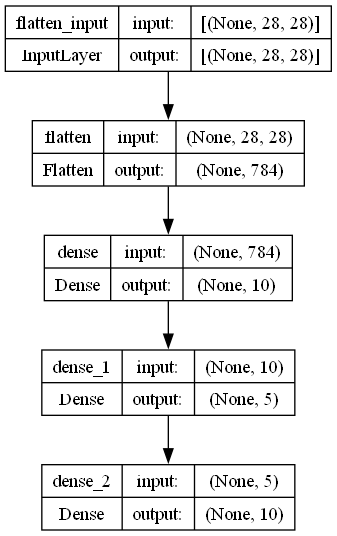

In [21]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, to_file="model.png")


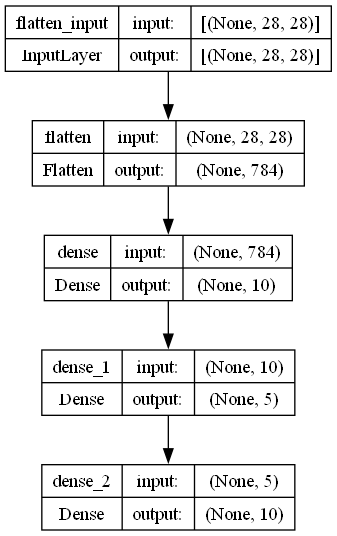

In [22]:
utils.plot_model(model,show_shapes=True)

In [23]:
model.save('mnist_model.keras')

In [24]:
from tensorflow import keras 
model = keras.models.load_model("mnist_model.keras")

model

In [25]:
history=model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test))

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5474 - acc: 0.8492 - val_loss: 0.5516 - val_acc: 0.8571
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5732 - acc: 0.8403 - val_loss: 0.5285 - val_acc: 0.8589
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5409 - acc: 0.8506 - val_loss: 0.5277 - val_acc: 0.8540
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5513 - acc: 0.8450 - val_loss: 0.5674 - val_acc: 0.8501
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5540 - acc: 0.8477 - val_loss: 0.5244 - val_acc: 0.8591
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5566 - acc: 0.8445 - val_loss: 0.5657 - val_acc: 0.8507
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5354 - acc: 0.8557 - val_loss: 0.5411 - val_acc: 0.8510
Epoch 8/20
1875/1875 [==============================] - 4s 2ms

In [26]:
model.save('mnist_model with graph for losses.keras')

In [27]:
history

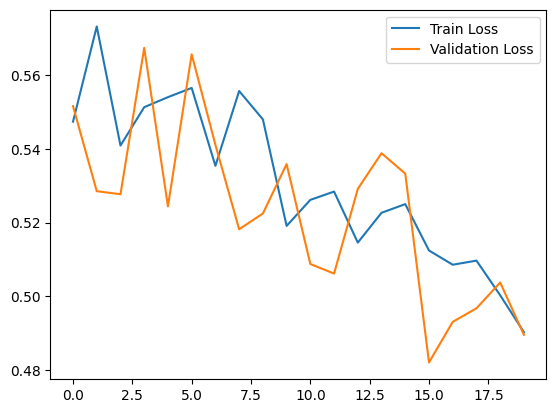

In [29]:
plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()

In [30]:
history.history

{'loss': [0.5473945140838623,
  0.5732430815696716,
  0.5409038662910461,
  0.5513251423835754,
  0.5540461540222168,
  0.5565510988235474,
  0.5353940725326538,
  0.5557143092155457,
  0.5480129718780518,
  0.519074022769928,
  0.5261511206626892,
  0.5283957123756409,
  0.5145414471626282,
  0.5226370692253113,
  0.5249941349029541,
  0.5123991966247559,
  0.5085296034812927,
  0.5096464157104492,
  0.5002322793006897,
  0.4902034401893616],
 'acc': [0.8492333292961121,
  0.8402666449546814,
  0.8505833148956299,
  0.8449833393096924,
  0.8476999998092651,
  0.8445333242416382,
  0.8557166457176208,
  0.8411999940872192,
  0.845883309841156,
  0.8601833581924438,
  0.8568999767303467,
  0.853950023651123,
  0.8570500016212463,
  0.8549333214759827,
  0.8547499775886536,
  0.8565999865531921,
  0.8637333512306213,
  0.8624333143234253,
  0.8621500134468079,
  0.866349995136261],
 'val_loss': [0.551615297794342,
  0.5285096764564514,
  0.5276753902435303,
  0.5674372315406799,
  0.5243

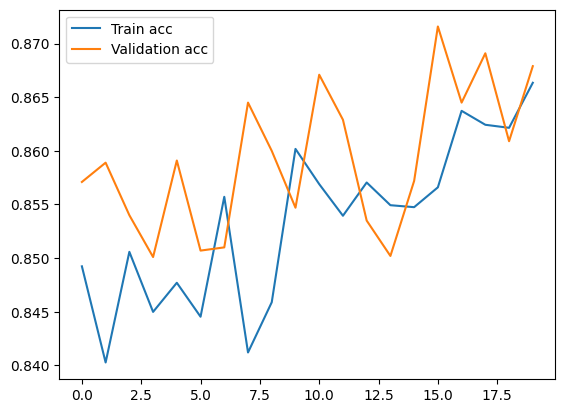

In [31]:
plt.plot(history.history['acc'],label='Train acc')
plt.plot(history.history['val_acc'],label='Validation acc')
plt.legend()

In [32]:
model=keras.models.load_model('mnist_model with graph for losses.keras')

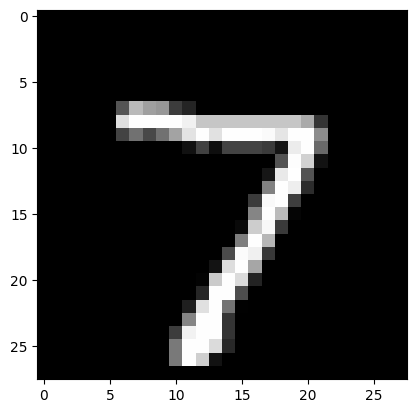

In [33]:
plt.imshow(X_test[0],cmap='gray')

In [37]:
X_test[0].shape

(28, 28)

In [35]:
import numpy as np
x=np.reshape(X_test[0],(1,28,28))#in this shape only model takes inputs for prediction
np.argmax(model.predict(x))

1/1 [==============================] - 0s 150ms/step


7

In [36]:
model.predict(x)

1/1 [==============================] - 0s 28ms/step


array([[6.3996305e-07, 1.1385298e-05, 1.3590553e-04, 1.4284799e-02,
        3.7973987e-05, 8.4689859e-04, 4.5970282e-08, 9.6812528e-01,
        4.7515357e-05, 1.6509453e-02]], dtype=float32)